In [1]:
from sn_line_vel.SpectrumSN import SpectrumSN

import pymc as pm
import numpy as np

# read spec data
z = 0.0307 #redshift
spec = './test_data/ZTF20aayhacx_20200513_NOT_v4.ascii' #spec file
Spec1 = SpectrumSN(spec, z, spec_resolution=5000/360)

# Si II

### Display the absorption feature

<AxesSubplot:xlabel='$\\mathrm{Wavelength}\\ [\\mathrm{\\r{A}}]$', ylabel='$\\mathrm{Flux}$'>

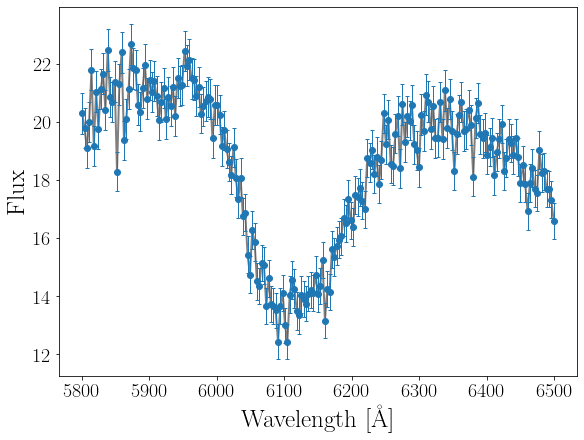

In [2]:
Spec1.plot_line_region(5800, 6500)

### Add absorption lines

We fit the hallmark features of SNe Ia - the Si II $\lambda$6355 doublet. The edges of the absorption features are manually selected - in this case, we use 5930--6330 angstroms. With `LS_estimator()`, we obtain the MLE with the least square method.

In [3]:
Spec1.add_line('SiII_6355', 5930, 6330, lines=[6371.359, 6347.103], rel_strength=[1, 1])
Spec1.line['SiII_6355'].LS_estimator((1, 1, -10000, 8, -1000))

LS estimation:
Velocity 1: -11887 km/s


Then we sample the posterior with a No-U-Turn Sampler (NUTS). The prior of the velocity profile has to be externally specified - a Gaussian prior is adopted, so one might specify $\mu$ and $\sigma$.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [blue_fl, red_fl, A, v_mean, ln_v_sig, sigma_0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 34 seconds.


                mean       sd    hdi_16%    hdi_84%  mcse_mean  mcse_sd  \
v_mean[0] -11867.143   90.395 -11952.458 -11771.679      2.249    1.591   
v_sig[0]    3316.102  117.740   3194.515   3428.252      3.070    2.172   
A[0]       -2615.590  127.565  -2730.466  -2479.750      3.469    2.453   
sigma_0        0.015    0.009      0.002      0.021      0.000    0.000   
EW_0          63.600    2.623     61.054     66.226      0.071    0.050   

           ess_bulk  ess_tail  r_hat  
v_mean[0]  1631.580  2335.978  1.002  
v_sig[0]   1462.649  1799.328  1.005  
A[0]       1351.159  1678.545  1.006  
sigma_0    1254.090  1041.535  1.001  
EW_0       1373.393  1663.221  1.006  


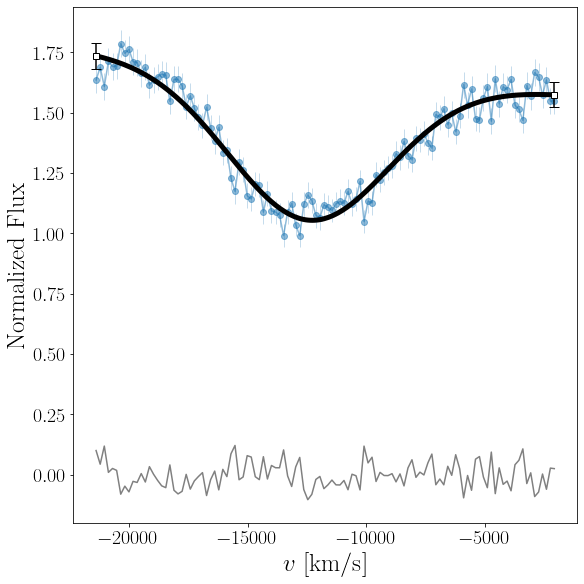

In [4]:
trace_SiII, Model_SiII, ax = Spec1.line["SiII_6355"].MCMC_sampler(
    vel_mean_mu=[-1e4],
    vel_mean_sig=[3e3],
    ln_vel_sig_mu=np.log([3e3]),
    ln_vel_sig_sig=[1],
)

# Ca II IRT

This script is also able to fit different velocity components simultaneously.

<AxesSubplot:xlabel='$\\mathrm{Wavelength}\\ [\\mathrm{\\r{A}}]$', ylabel='$\\mathrm{Flux}$'>

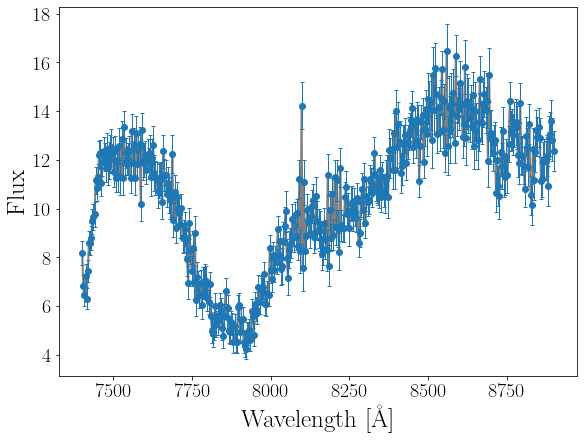

In [5]:
Spec1.plot_line_region(7400, 8900)

Many SNe Ia show two velocity components of Ca II infrared triplet (IRT). The `AbsorbLine` class also enables us to fit lines with different velocities simultaneously.

In [6]:
Spec1.add_line('CaII_IRT/CaII_IRT',
               7500,
               8650,
               lines=[[8498.018, 8542.089, 8662.140],
                      [8498.018, 8542.089, 8662.140]],
               rel_strength=[[1, 1, 1], [1, 1, 1]])
Spec1.line['CaII_IRT/CaII_IRT'].LS_estimator(guess=(1, 1, -25000, 8, -1000,
                                                    -12000, 8, -1000))

LS estimation:
Velocity 1: -24506 km/s
Velocity 2: -11212 km/s


## NUTS

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [blue_fl, red_fl, A, v_mean, ln_v_sig, sigma_0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 43 seconds.


                mean       sd    hdi_16%    hdi_84%  mcse_mean  mcse_sd  \
v_mean[0] -24530.803  129.985 -24621.195 -24378.141      3.184    2.255   
v_mean[1] -11375.543  283.131 -11645.554 -11100.535      6.735    4.780   
v_sig[0]    4074.296  173.110   3898.080   4237.516      4.316    3.052   
v_sig[1]    3281.832  397.393   2816.646   3567.796     10.252    7.446   
A[0]       -2526.424   90.706  -2617.214  -2437.412      2.222    1.571   
A[1]       -1011.617   94.127  -1086.511   -910.115      2.426    1.753   
sigma_0        0.028    0.005      0.023      0.033      0.000    0.000   
EW_0         195.209    6.303    189.092    201.353      0.163    0.115   
EW_1          78.142    6.905     70.669     83.598      0.181    0.130   

           ess_bulk  ess_tail  r_hat  
v_mean[0]  1786.650  1748.515  1.002  
v_mean[1]  1823.900  1938.268  1.002  
v_sig[0]   1612.530  1828.513  1.004  
v_sig[1]   1639.664  1466.942  1.002  
A[0]       1672.311  1848.685  1.002  
A[1]       1667

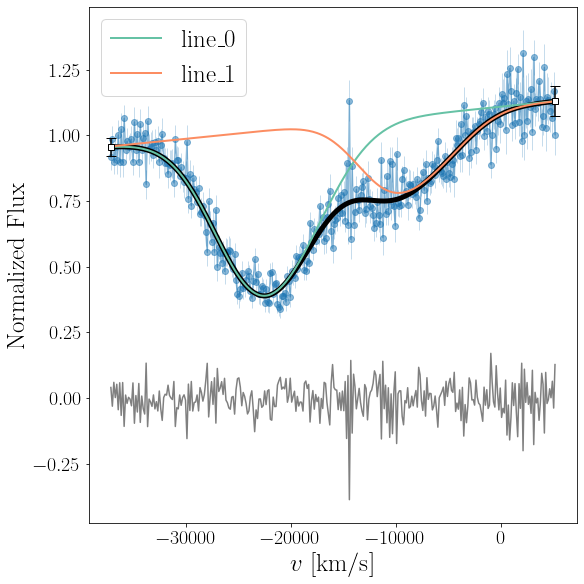

In [7]:
trace_CaII, Model_CaII, ax = Spec1.line["CaII_IRT/CaII_IRT"].MCMC_sampler(
    vel_mean_mu=[-2.5e4, -1.0e4],
    vel_mean_sig=[3e3, 3e3],
    ln_vel_sig_mu=np.log([3e3, 3e3]),
    ln_vel_sig_sig=[1, 1],
)

## Metropolis-Hastings

With the NUTS sampler, we can obtain a effective sample size (ESS) a factor of $\sim$$50$ greater than that obtained using M-H sampler.

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [blue_fl]
>Metropolis: [red_fl]
>Metropolis: [A]
>Metropolis: [v_mean]
>Metropolis: [ln_v_sig]
>Metropolis: [sigma_0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 18 seconds.


                mean       sd    hdi_16%    hdi_84%  mcse_mean  mcse_sd  \
v_mean[0] -24532.313  133.375 -24666.470 -24408.954     15.232   10.821   
v_mean[1] -11385.689  278.864 -11595.964 -11070.351     36.783   26.238   
v_sig[0]    4040.175  182.944   3851.877   4209.225     35.328   25.270   
v_sig[1]    3325.793  418.797   2771.138   3566.131     63.015   45.393   
A[0]       -2504.709   96.267  -2587.823  -2401.355     20.854   14.980   
A[1]       -1019.352   98.463  -1075.961   -903.410     12.937    9.210   
sigma_0        0.028    0.005      0.023      0.033      0.000    0.000   
EW_0         193.727    6.690    185.313    198.581      1.456    1.047   
EW_1          78.818    7.230     70.861     83.372      1.027    0.730   

           ess_bulk  ess_tail  r_hat  
v_mean[0]    80.388   112.420  1.026  
v_mean[1]    59.001   117.268  1.033  
v_sig[0]     27.271    55.698  1.104  
v_sig[1]     47.358   118.860  1.056  
A[0]         22.799    42.792  1.134  
A[1]         58

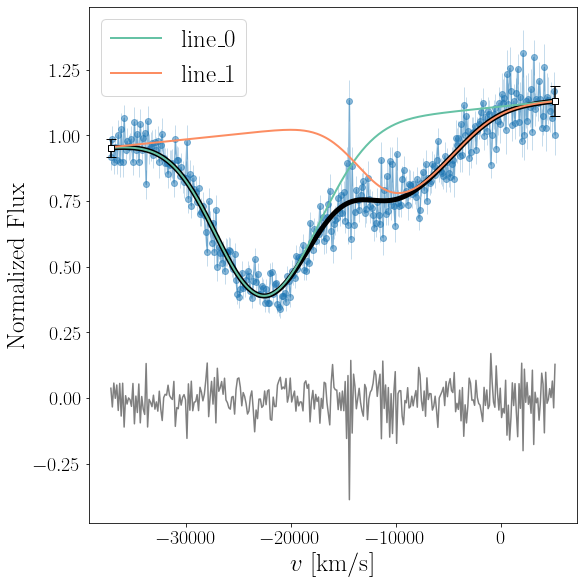

In [8]:
trace_CaII, Model_CaII, ax = Spec1.line["CaII_IRT/CaII_IRT"].MCMC_sampler(
    vel_mean_mu=[-2.5e4, -1.0e4],
    vel_mean_sig=[3e3, 3e3],
    ln_vel_sig_mu=np.log([3e3, 3e3]),
    ln_vel_sig_sig=[1, 1],
    sampler="MH"
)

### A graphic model

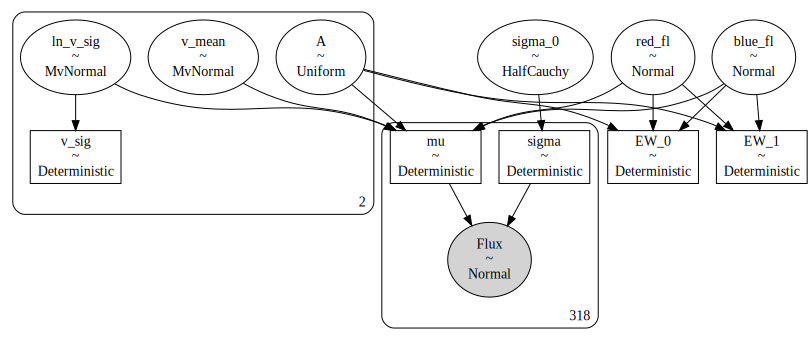

In [9]:
pm.model_to_graphviz(Model_CaII)